# Dummy Cl's

In [1]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)

sys.path.insert(1, '/home/zcapjru/PhD/DEScls')

from xcell.mappers import MapperDummy
from astropy.io import fits
from astropy.table import Table
import pyccl as ccl
import numpy as np
import pylab as plt
import pymaster as nmt
import healpy as hp

In [2]:
# Initialize binning scheme with 20 ells per bandpower
nside =  64
nside_mask = 64
#bands = nmt.NmtBin.from_nside_linear(nside, 20)
#ell_arr = bands.get_effective_ells()

In [3]:
ells = []
i = 11.5
while i <= 3 * nside:
    ells.append(round(i))
    #i = i*(1+i/(3 * nside))
    i = i+20*(1+i/240)
    
if ells[-1] <  3 * nside -1:   
    ells.append(3 * nside -1)
    
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [4]:
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [5]:
dummy_maps = MapperDummy()

In [6]:
def compute_cl(f_a, f_b, wsp):
    # Compute the power spectrum (a la anafast) of the masked fields
    # Note that we only use n_iter=0 here to speed up the computation,
    # but the default value of 3 is recommended in general.
    cl_coupled = nmt.compute_coupled_cell(f_a, f_b)
    # Decouple power spectrum into bandpowers inverting the coupling matrix
    #cl_decoupled = wsp.decouple_cell(cl_coupled) #removed bias here

    return cl_coupled

In [7]:
dummy_f =  dummy_maps.get_nmt_field()

In [8]:
dummy_w = nmt.NmtWorkspace()
dummy_w.compute_coupling_matrix(dummy_f, dummy_f, bands)

In [10]:
dummy_cl = compute_cl(dummy_f, dummy_f, dummy_w)
dummy_nl = dummy_maps.get_nl_coupled() 

In [11]:
dummy_cl = dummy_w.decouple_cell(dummy_cl) - dummy_w.decouple_cell(dummy_nl)

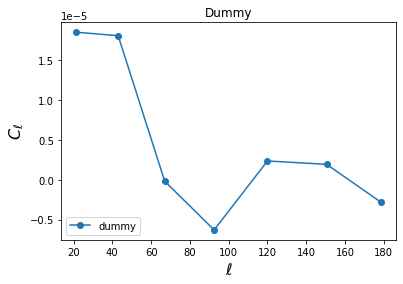

In [13]:
plt.plot(ell_arr, dummy_cl[0], 'o-', label='dummy')
#plt.loglog()
plt.title('Dummy')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()